In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/processed/seismic_master_validated.csv")

df["timestamp"] = pd.to_datetime(
    df["timestamp"],
    format="mixed",
    utc=True
)

df["timestamp"].dtype


datetime64[ns, UTC]

In [3]:
df["year_month"] = df["timestamp"].dt.to_period("M")

df[["timestamp", "year_month"]].head()


/var/folders/bv/mp08q1_52dz_qbs5_34gjdfr0000gn/T/ipykernel_21308/3564399969.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["timestamp"].dt.to_period("M")


,timestamp,year_month
0,1990-01-09 02:29:26.690000+00:00,1990-01
1,1990-01-10 23:01:21.960000+00:00,1990-01
2,1990-01-30 15:06:26.080000+00:00,1990-01
3,1990-02-09 15:51:23.020000+00:00,1990-02
4,1990-02-21 07:21:17.300000+00:00,1990-02


In [4]:
df.dtypes


timestamp                datetime64[ns, UTC]
latitude                             float64
longitude                            float64
depth                                float64
magnitude                            float64
place                                 object
source                                object
depth_log                            float64
lat_offset                           float64
lon_offset                           float64
year                                   int64
month_sin                            float64
month_cos                            float64
hour_sin                             float64
hour_cos                             float64
rolling_count_7d                       int64
rolling_count_30d                      int64
rolling_mean_mag_30d                 float64
days_since_last_major                float64
is_major                               int64
month                                  int64
year_month                         period[M]
dtype: obj

In [5]:
monthly_kpis = (
    df.groupby("year_month")
      .agg(
          earthquake_count=("magnitude", "count"),
          avg_magnitude=("magnitude", "mean"),
          max_magnitude=("magnitude", "max"),
          major_events=("is_major", "sum")
      )
      .reset_index()
)

monthly_kpis.head()

,year_month,earthquake_count,avg_magnitude,max_magnitude,major_events
0,1990-01,3,4.90,5.5,1
1,1990-02,2,4.70,4.8,0
2,1990-03,1,4.30,4.3,0
3,1990-05,2,4.65,4.8,0
4,1990-09,1,4.30,4.3,0


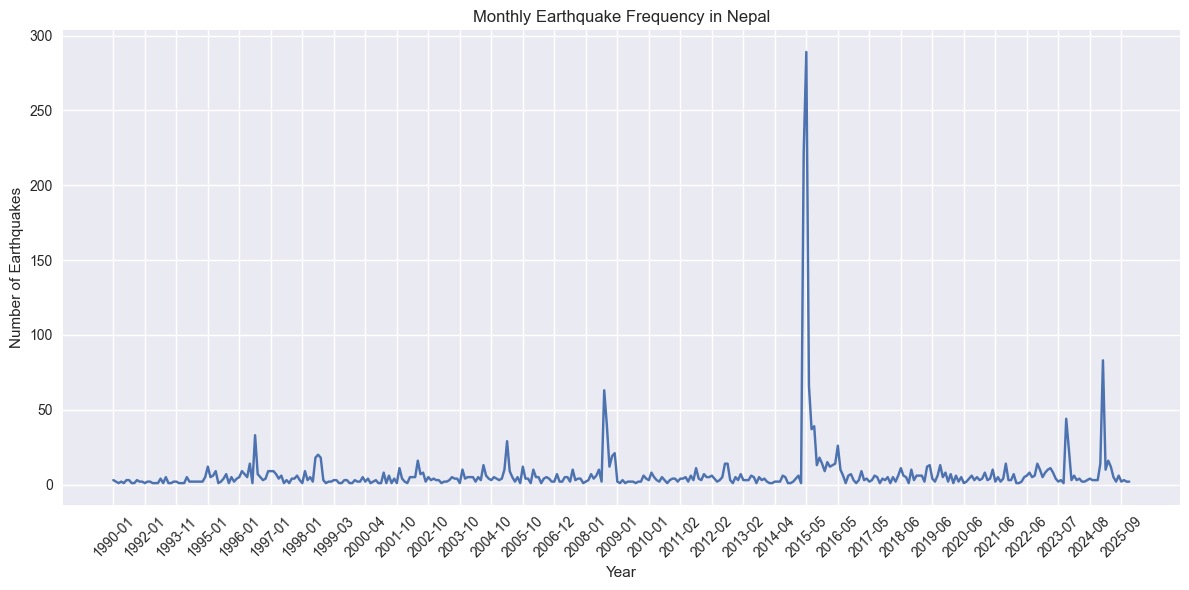

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["earthquake_count"]
)

plt.title("Monthly Earthquake Frequency in Nepal")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")

# Show one x-tick per year
year_ticks = monthly_kpis["year_month"].astype(str)[::12]
plt.xticks(
    ticks=range(0, len(monthly_kpis), 12),
    labels=year_ticks,
    rotation=45
)

plt.tight_layout()
plt.savefig("../outputs/figures/monthly_earthquake_frequency.png", dpi=150)
plt.show()


In [7]:
monthly_kpis["rolling_12m_avg"] = (
    monthly_kpis["earthquake_count"]
    .rolling(window=12, min_periods=1)
    .mean()
)

monthly_kpis.head(15)


,year_month,earthquake_count,avg_magnitude,max_magnitude,major_events,rolling_12m_avg
0,1990-01,3,4.900000,5.5,1,3.000000
1,1990-02,2,4.700000,4.8,0,2.500000
2,1990-03,1,4.300000,4.3,0,2.000000
3,1990-05,2,4.650000,4.8,0,2.000000
4,1990-09,1,4.300000,4.3,0,1.800000
5,1990-10,3,4.566667,4.9,0,2.000000
6,1990-11,3,4.833333,4.9,0,2.142857
7,1990-12,1,4.800000,4.8,0,2.000000
8,1991-03,1,4.600000,4.6,0,1.888889
9,1991-05,3,4.566667,4.6,0,2.000000


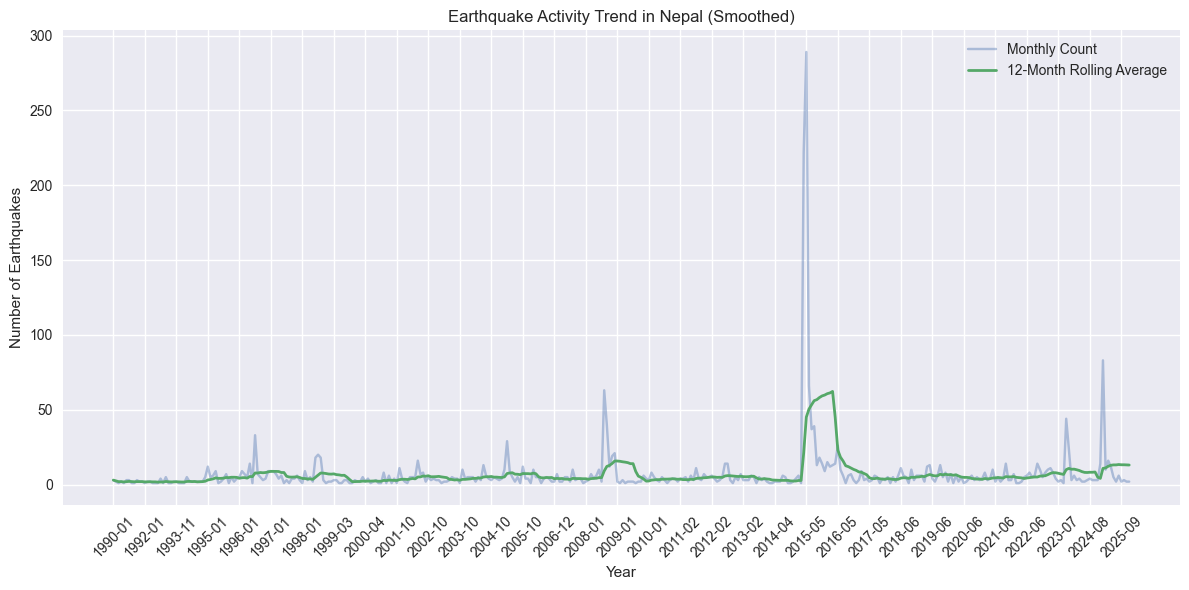

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["earthquake_count"],
    alpha=0.4,
    label="Monthly Count"
)

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["rolling_12m_avg"],
    linewidth=2,
    label="12-Month Rolling Average"
)

plt.title("Earthquake Activity Trend in Nepal (Smoothed)")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend()

# Clean x-axis: one tick per year
year_ticks = monthly_kpis["year_month"].astype(str)[::12]
plt.xticks(
    ticks=range(0, len(monthly_kpis), 12),
    labels=year_ticks,
    rotation=45
)

plt.tight_layout()
plt.savefig("../outputs/figures/rolling_earthquake_trend.png", dpi=150)
plt.show()


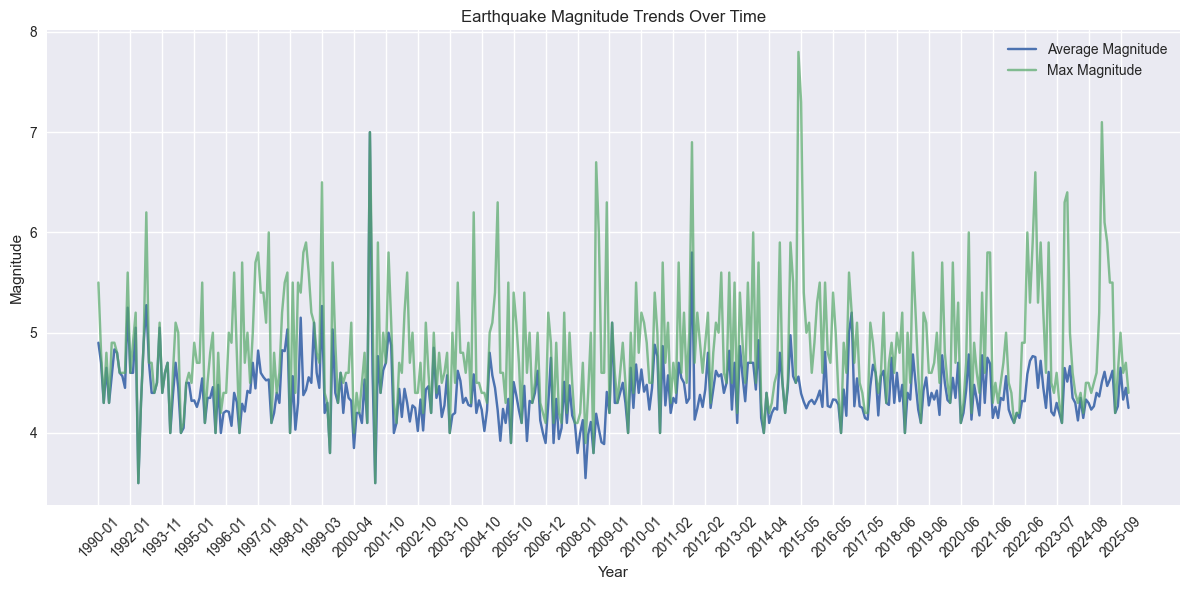

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["avg_magnitude"],
    label="Average Magnitude"
)

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["max_magnitude"],
    label="Max Magnitude",
    alpha=0.7
)

plt.title("Earthquake Magnitude Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.legend()

# Clean x-axis: one tick per year
year_ticks = monthly_kpis["year_month"].astype(str)[::12]
plt.xticks(
    ticks=range(0, len(monthly_kpis), 12),
    labels=year_ticks,
    rotation=45
)

plt.tight_layout()
plt.savefig("../outputs/figures/magnitude_trends.png", dpi=150)
plt.show()


In [11]:
monthly_kpis["major_event_ratio"] = (
    monthly_kpis["major_events"] / monthly_kpis["earthquake_count"]
).fillna(0)

monthly_kpis[["year_month", "major_event_ratio"]].head()

monthly_kpis["major_event_ratio"].describe()



count    388.000000
mean       0.109590
std        0.189971
min        0.000000
25%        0.000000
50%        0.000000
75%        0.170455
max        1.000000
Name: major_event_ratio, dtype: float64

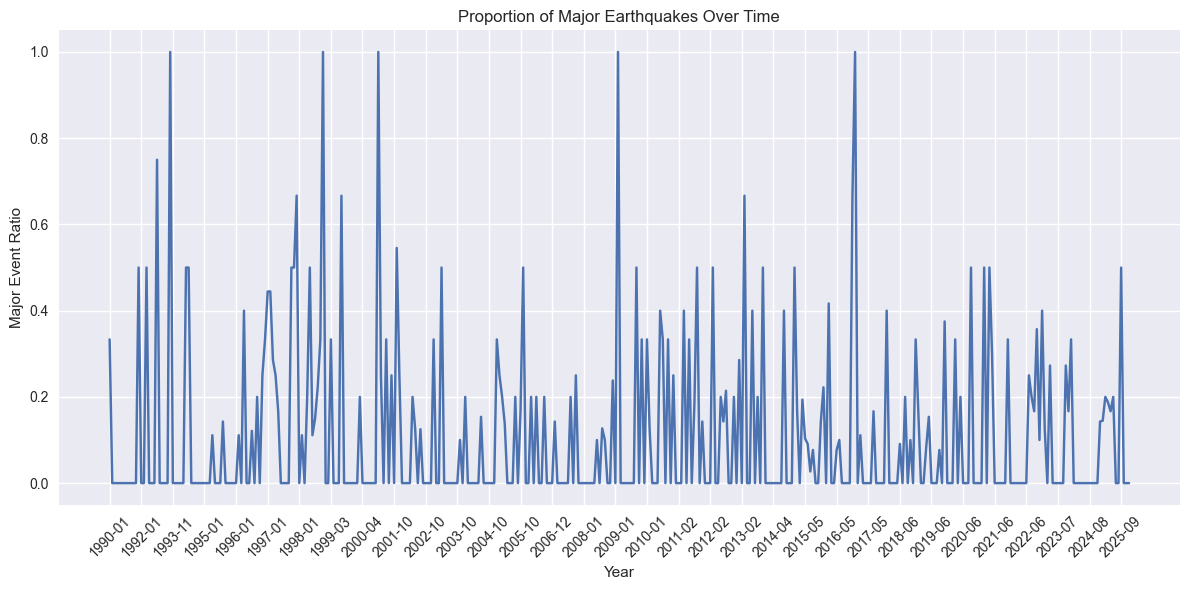

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_kpis["year_month"].astype(str),
    monthly_kpis["major_event_ratio"]
)

plt.title("Proportion of Major Earthquakes Over Time")
plt.xlabel("Year")
plt.ylabel("Major Event Ratio")

# Clean x-axis: one tick per year
year_ticks = monthly_kpis["year_month"].astype(str)[::12]
plt.xticks(
    ticks=range(0, len(monthly_kpis), 12),
    labels=year_ticks,
    rotation=45
)

plt.tight_layout()
plt.savefig("../outputs/figures/major_event_ratio.png", dpi=150)
plt.show()


In [13]:
monthly_kpis.to_csv(
    "../data/processed/monthly_seismic_kpis.csv",
    index=False
)


KPI Summary

This notebook aggregates seismic activity in Nepal at a monthly level to derive key performance indicators, including earthquake frequency, magnitude trends, rolling activity averages, and the contribution of major events. These KPIs provide a foundation for regional comparisons and seismic risk signal analysis.